### Ch10 Figure1

In [1]:
# Let's say the team decides to approach the question of romantic running partners. They decide that the best way to look at this data is to see if there are customers that share the same address. Then compare their orders. See if one customer started ordering before the other.

shoes_type = ['lightweight trainer', 'cross-trainer', 'trail', 'stability', 'cushioned stability', 'neutral', 'motion control', 'walking', 'racing']
data = dict()

for i in range(1000):
    if rd.random() <= .8:
        orders=1
    else:
        orders = rd.randint(2,4)
    timestamp = [random_date() for x in range(orders)]
    shoetype = [shoes_type[rd.randint(0, len(shoes_type)-1)] for x in range(orders)]
    
    data[i] = {'number-of-orders': orders, 'timestamps': timestamp, 'shoetype': shoetype}

import pickle
# pickle.dump(data, open('csv_output\ch10_fig1.pickle', 'wb'))

In [3]:
# data example
# {0: {'number-of-orders': 1,
#   'shoetype': ['cross-trainer'],
#   'timestamps': [datetime.datetime(2009, 3, 7, 0, 4, 50)]},
#  1: {'number-of-orders': 1,
#   'shoetype': ['stability'],
#   'timestamps': [datetime.datetime(2009, 3, 21, 9, 11, 57)]},
#  2: {'number-of-orders': 1,
#   'shoetype': ['motion control'],
#   'timestamps': [datetime.datetime(2009, 3, 29, 3, 38, 20)]},
# ...

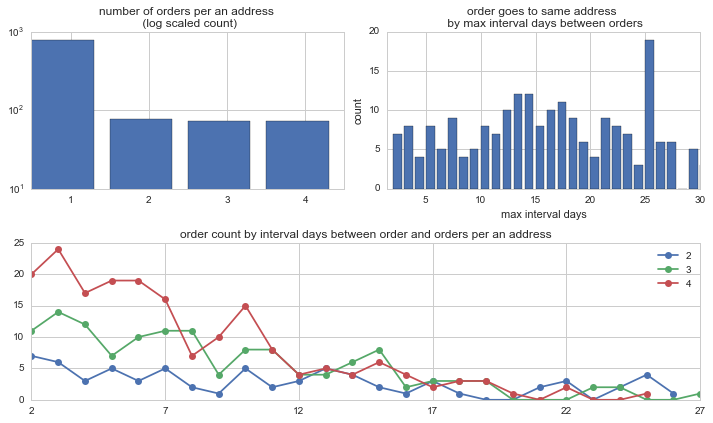

In [2]:
import pickle
data = pickle.load(open('csv_output\ch10_fig1.pickle', 'rb'))

keys = list(data.keys())

freq = []
for i in keys:
    freq.append(data[i]['number-of-orders'])

span = []
for i in keys:
    if data[i]['number-of-orders'] == 1:
        s = 0
    else:
        s = (max(data[i]['timestamps']) - min(data[i]['timestamps'])).days
    span.append(s)

per_order_interval = {2:[],3:[],4:[]}
for i in keys:
    if data[i]['number-of-orders'] == 1:
        s = 0
#         per_order_interval.append(s)
    else:
        tt = data[i]['timestamps']
        tt.sort()
        t1 = np.array(tt[1:]) - np.array(tt[:-1])
        per_order_interval[data[i]['number-of-orders']].extend([x.days for x in t1])
    
%matplotlib inline
sns.set_style("whitegrid")    
import matplotlib.cm as cm

f, ax2 = plt.subplots(2,2, figsize=(10,6))
ax = ax2[0][0]
ax1 = ax2[0][1]
# ax3 = ax2[1][1]
ax2 = plt.subplot2grid((2,2), (1,0), colspan=2)

blues=["#a2d9ed","#44a2d4","#80bad0","#60c9f4","#5994a8"]

i=0

d1 = pd.DataFrame([[1,2,3,4], list(np.bincount(freq)[1:])], index=['order-number', 'count']).transpose()
d1 = d1.sort_values('count', ascending=False)
d1['r'] = (d1['count']/d1['count'].sum()).cumsum()
d1 = d1.sort_values('r', ascending=False)

d2 = pd.DataFrame([list(np.arange(2,32)), list(np.bincount(span)[1:])], index=['longest interval days', 'count']).transpose()
d2 = d2.sort_values('longest interval days', ascending=True)
d2['r'] = (d2['count']/d2['count'].sum()).cumsum()
d2 = d2.sort_values('r', ascending=False)

new = True
for x in range(2,5):
    d3 = pd.DataFrame([np.arange(2,32), np.bincount(per_order_interval[x])[1:]], index=['per order interval', 'count']).transpose()
    d3['n-orders'] = x
    if new:
        d6 = d3.copy()
        new = False
    else:
        d6 = pd.concat([d6, d3], axis=0)

ax.bar(left=d1['order-number'], height=d1['count'])
ax.set_yscale("log", nonposy='clip')
ax.set_title('number of orders per an address \n (log scaled count)')
ax.set_xticks(np.arange(1,5)+.5);
ax.set_xticklabels(np.arange(1,5));

ax1.bar(left=d2['longest interval days'], height=d2['count']);
ax1.set_title('order goes to same address \n by max interval days between orders');
ax1.set_ylabel('count');
ax1.set_xlabel('max interval days');
ax1.set_xlim(1.5,30);

for x in range(2,5):
    ax2.plot(d6[d6['n-orders'] == x]['count'], 'o-')

ax2.set_xticks(np.arange(0,30,5))
ax2.set_xticklabels(np.arange(2,30,5))
ax2.set_title('order count by interval days between order and orders per an address')
ax2.legend([2,3,4])

f.tight_layout()
f.savefig('svg_output/ch10_fig1.svg', format='svg')

Most address has only one order, there's maximum 4 orders per an address in a one month window. Excluding those with just one order, averagely, the max interval days of one address (last order date - first order date) is 16.5 days. If we compare the interval days order to order, most likely people will place another order within 15 days, the more they order within one month timeframe, the more orders they will place within the first 7 days.